In [1]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

haberman= pd.read_csv("haberman.csv")

In [2]:
#Since there is not any column names in haberman's dataset.I am adding column names here.
haberman.columns=['Age','Op_Year','Axil_Nodes','Surv_status']

In [3]:
#Mapping Class variable values : 1 as People loss lives in more than 5 years having surgery and People loss lives within 5 years having surgery
haberman["Surv_status"]=haberman["Surv_status"].map({1:"More_5",2:"Within_5"})
haberman.head()

,Age,Op_Year,Axil_Nodes,Surv_status
0,30,62,3,More_5
1,30,65,0,More_5
2,31,59,2,More_5
3,31,65,4,More_5
4,33,58,10,More_5


In [4]:
#Number of datapoints and features
haberman.shape

(305, 4)

In [5]:
#Number of classes and datapoints per class
haberman["Surv_status"].value_counts()

#Observation:
#Haberman Dataset is imbalanced dataset

More_5      224
Within_5     81
Name: Surv_status, dtype: int64

In [6]:
haberman.describe()

,Age,Op_Year,Axil_Nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


<h2>2.Objective</h2>

In [7]:
#Based on data whether the patient die within 5 year or more having surgery

<h2>3.Univariate Analysis</h2>

<h3>3.1 PDF</h3>

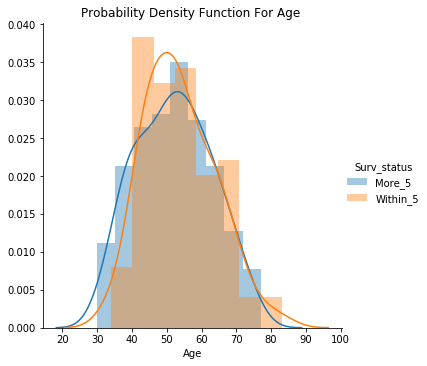

In [8]:
 sns.FacetGrid(haberman,hue="Surv_status",height=5)\
    .map(sns.distplot,"Age")\
    .add_legend()
plt.title("Probability Density Function For Age ")
plt.show()

<p>Observation:<br>
1.Age between 30 and 83 have cancer.<br>
2.Most of data overlapping here and it is difficult here to classify whether the patient survive more than 5 or within 5 having surgery.<br>
3.Patient having age less than aprox. 34 survive more <br>
4.Age above approx. 77 live less <br>
    <p>

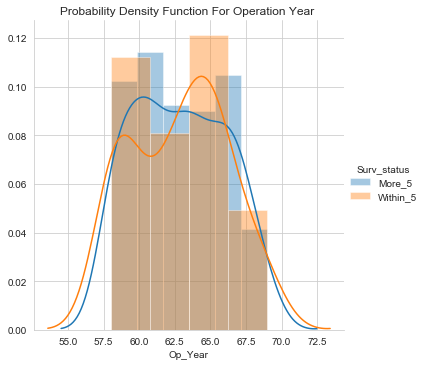

In [22]:
sns.FacetGrid(haberman,hue="Surv_status",height=5)\
    .map(sns.distplot,"Op_Year")\
    .add_legend()
plt.title("Probability Density Function For Operation Year ")
plt.show()

<p>Obervation:<br>
1.All data overlap to each other means we cant say anything her
    </p>

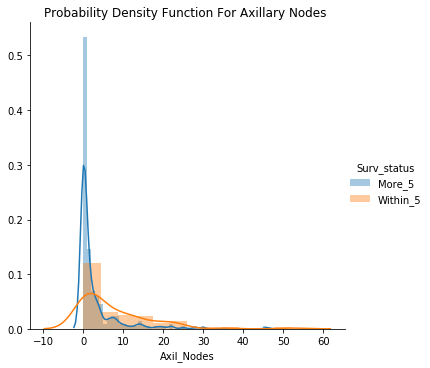

In [10]:
sns.FacetGrid(haberman,hue="Surv_status",size=5)\
    .map(sns.distplot,"Axil_Nodes")\
    .add_legend()
plt.title("Probability Density Function For Axillary Nodes ")
plt.show()

<p>
Observation:<br>
1.Hieght of blue curve is more in range of some negative value to 7 which means patient having  lower axil nodes lives longer<br>
2.We can not classify axil nodes beyond 30
    
</p>

<h3>3.2 CDF</h3>


[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.04910714 0.15625    0.28125    0.375      0.54017857 0.70535714
 0.79910714 0.91071429 0.97321429 1.        ]


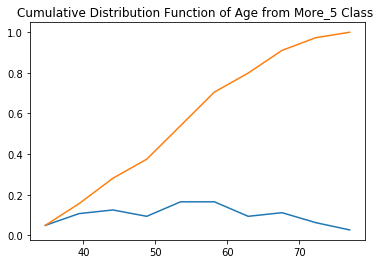

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


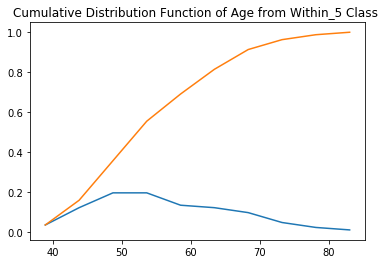

In [11]:
haberman_more = haberman.loc[haberman["Surv_status"]=="More_5"]
haberman_less = haberman.loc[haberman["Surv_status"]=="Within_5"]


count,bin_edges=np.histogram(haberman_more["Age"],bins=10,density=True)

pdf = count/sum(count)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("Cumulative Distribution Function of Age from More_5 Class ")
plt.show()

count,bin_edges=np.histogram(haberman_less["Age"],bins=10,density=True)

pdf = count/sum(count)
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("Cumulative Distribution Function of Age from Within_5 Class ")
plt.show()

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


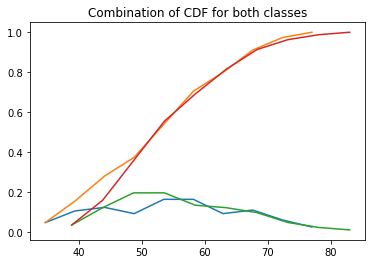

In [12]:
#Person Living more than 5 years
counts, bin_edges = np.histogram(haberman_more['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#Person living within 5 years
counts, bin_edges = np.histogram(haberman_less['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title("Combination of CDF for both classes")
plt.show()


<p>Observation :<br>
Person having age approx less that 38 live more than 5 years having surgery
</p>

<h3>3.3 Box Plot</h3>

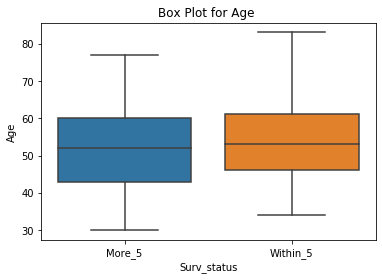

In [13]:

sns.boxplot(x="Surv_status",y="Age",data=haberman)
plt.title("Box Plot for Age ")
plt.show()

<p>Observation:<br>
 1.We can't use this graph to classify result most data is overlapping<br>
 2.75th percentile value of box plot is 61 and 25th percentile value is 44
    </p>

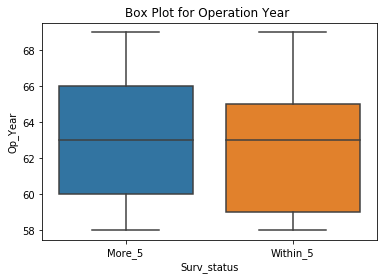

In [14]:
sns.boxplot(x="Surv_status",y="Op_Year",data=haberman)
plt.title("Box Plot for Operation Year ")
plt.show()

<p>Observation<br>
 1.Lots of data is also overlapping here.
 2.75th percentile value of box plot is 61 and 25th percentile value is 44 of More_5 class.

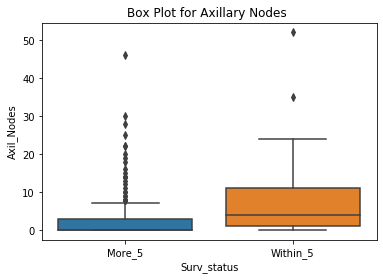

In [15]:
sns.boxplot(x="Surv_status",y="Axil_Nodes",data=haberman)
plt.title("Box Plot for Axillary Nodes ")
plt.show()

<p>Observation:<br>
1.There are more outliers(error values) in More_5 category of surviving status.<br>
2.75th percentile value of box plot is 0.00 and 25th percentile value is 4
</p>

<h3>3.4 Violin Plots</h3>

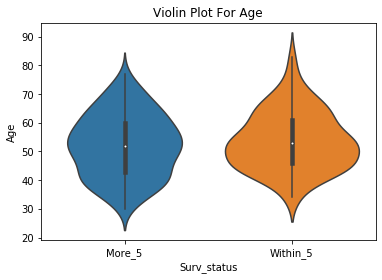

In [16]:
sns.violinplot(x="Surv_status",y="Age",data=haberman)
plt.title("Violin Plot For Age")
plt.show()

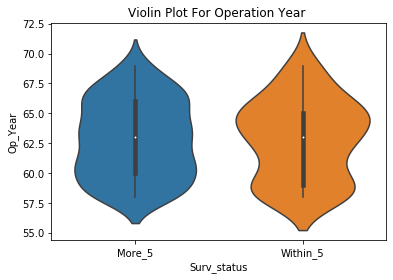

In [17]:
sns.violinplot(x="Surv_status",y="Op_Year",data=haberman)
plt.title("Violin Plot For Operation Year ")
plt.show()

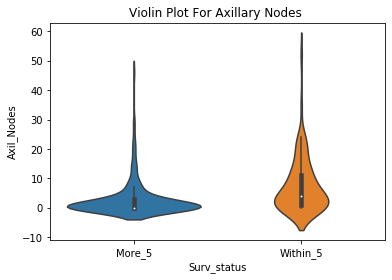

In [18]:
sns.violinplot(x="Surv_status",y="Axil_Nodes",data=haberman)
plt.title("Violin Plot For Axillary Nodes ")
plt.show()

<h2>4.Bivariate Analysis<h2>
    <h3>4.1 Scatter Plot</h3>

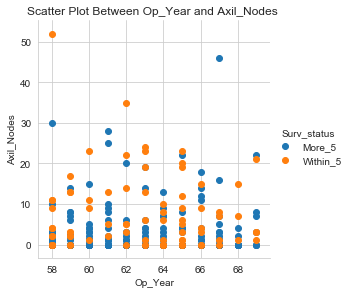

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status",height=4) \
   .map(plt.scatter, "Op_Year", "Axil_Nodes") \
   .add_legend();
plt.title("Scatter Plot Between Op_Year and Axil_Nodes ")
plt.show();

<p>Observations <br>
1.Lots of data is overlapping here hence we can not classify using these two variables.I took
any two variables randomly here since we can not draw each possibility taking two at a time.So we
will use pair plot here to see each possibility</p>

<h3>4.2 Pairplot</h3>

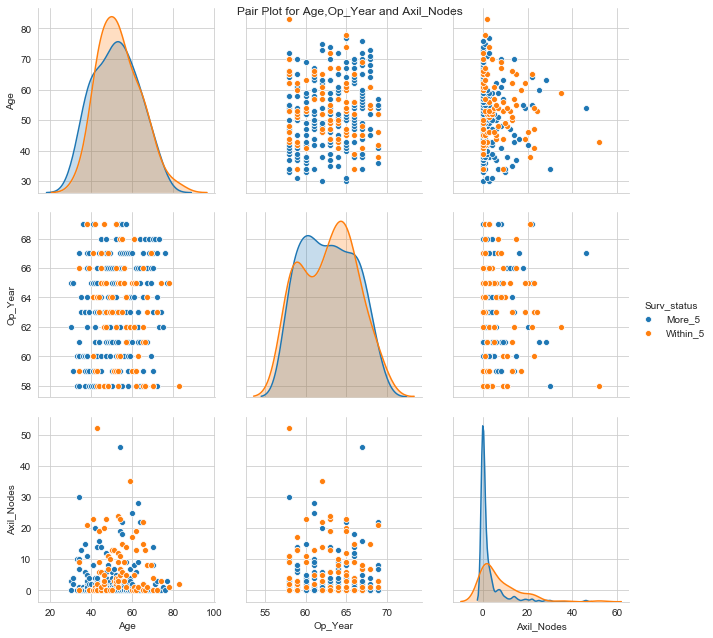

In [20]:
sns.pairplot(haberman,hue="Surv_status",height=3)
plt.suptitle("Pair Plot for Age,Op_Year and Axil_Nodes")
plt.show()

<p>Observations :<br>
1.Plot between Age and Axil_Nodes classifying better whether person live more than 5 or less than 5 after surgery<br>
2.Plot between Op_Year and Age telling that many people with low age living more than 5 having surgery
</p>

<h3>Median,Percentile and MAD </h3>

In [21]:

print("Meadians")
print(np.median(haberman_more['Axil_Nodes']))
print(np.median(haberman_less['Axil_Nodes']))
print("\nQuantiles")
print(np.percentile(haberman_more['Axil_Nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_less['Axil_Nodes'],np.arange(0,100,25)))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_more['Axil_Nodes']))
print(robust.mad(haberman_less['Axil_Nodes']))

Meadians
0.0
4.0

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
0.0
5.930408874022408
